## 任务四：图的深度优先搜索和广度优先搜索（难度：★★★★）

**实现基本功能**：（涉及到两个类：队列类和图类）不唯一哈，仅代表个人想法

　1. 队列类（直接用第二期栈和队列中的顺序队列代码即可）
 
　　（1）队列初始化
	
　　（2）返回队列的长度

　　（3）入队：添加元素到队尾

　　（4）出队：删除队头元素
 
　2. 图类：

　（1）图的初始化

　（2）添加边（字典存储）key和value表示顶点关系
 
　（3）输出图中结点之间的关系

　（4）深度优先搜索:采用递归和栈实现都可，这里采用递归实现

　（5）输出深度优先搜索结果

　（6）广度优先搜索：采用队列实现
	
　（7）输出广度优先搜索结果

**测试案例：**

![Image Name](https://cdn.kesci.com/upload/image/qwy85g7f4s.png?imageView2/0/w/960/h/960)

**输出结果**

（1）输出结点之间关系：

　　　　　V1 --  V2 --  V3
　　　　　V2 --  V1 --  V4 --  V5
　　　　　V3 --  V1 --  V6 --  V7
　　　　　V4 --  V2 --  V8
　　　　　V5 --  V2 --  V8
　　　　　V6 --  V3 --  V7
　　　　　V7 --  V3 --  V6
　　　　　V8 --  V4 --  V5

（2）深度和广度优先搜索结果：

　　　　深度优先搜索: V1 -> V2 -> V4 -> V8 -> V5 -> V3 -> V6 -> V7
　　　　广度优先搜索: V1 -> V2 -> V3 -> V4 -> V5 -> V6 -> V7 -> V8

### 1. 定义队列类

In [1]:
## 队列类: 广度深度搜索需要用到
class Queue():
    # 初始化
    def __init__(self):
        self.array = []
    
    # 返回队列的长度
    def QueueLength(self):
        return len(self.array)
    
    # 入队，添加元素到队尾
    def EnQueue(self, item):
        self.array.append(item)
    
    # 出队，删除队头元素
    def DeQueue(self):
        return self.array.pop(0) # pop(0):删除第一个元素

### 2. 定义图类

In [2]:
class Graph():
    # 初始化
    def __init__(self):
        self.dict = {} # 采用字典方式存储顶点之间的关系
        self.visited_DFS = [] # 深度优先搜索访问标志数组
        self.visited_BFS = [] # 广度优先搜索访问标志数组
    
    # 添加顶点之间的关系
    def AddEdge(self, key, value):
        self.dict[key] = value
    
    # 输出图中结点之间的关系
    def ShowNode(self):
        for key,value in self.dict.items():
            print(key, end='')
            for val in value:
                print(' -- ', val, end = '')
            print()
    
    # 深度优先搜索:采用递归和栈实现都可，这里采用递归实现
    def DFS(self, root):
        if root not in self.dict.keys(): # 先判断输入的结点是否正确
            print("根结点有误！")
            return
        if root in self.visited_DFS: # 如果遍历的点已经被访问了，则直接跳过
            return
        self.visited_DFS.append(root) # 如果输入的结点第一次访问，则需加到访问数组中
        for val in self.dict[root]:
            self.DFS(val)
    
    # 输出深度优先搜索结果
    def DFSTraverse(self):
        for visit in self.visited_DFS:
            if visit == self.visited_DFS[-1]:
                break
            print(visit, end=' -> ')
        print(visit)
    
    # 广度优先搜索：采用队列实现
    def BFS(self, root):
        if root not in self.dict.keys(): # 先判断输入的结点是否正确
            print("根结点有误！")
            return
        queue = Queue()
        queue.EnQueue(root)
        self.visited_BFS.append(root)
        while queue.QueueLength() > 0:
            key = queue.DeQueue()
            for val in self.dict[key]:
                if val not in self.visited_BFS:
                    queue.EnQueue(val)
                    self.visited_BFS.append(val)
    
    # 输出广度优先搜索结果
    def BFSTraverse(self):
        for visit in self.visited_BFS:
            if visit == self.visited_BFS[-1]:
                break
            print(visit, end=' -> ')
        print(visit)

### 3. 测试案例

![Image Name](https://cdn.kesci.com/upload/image/qwy85g7f4s.png?imageView2/0/w/960/h/960)
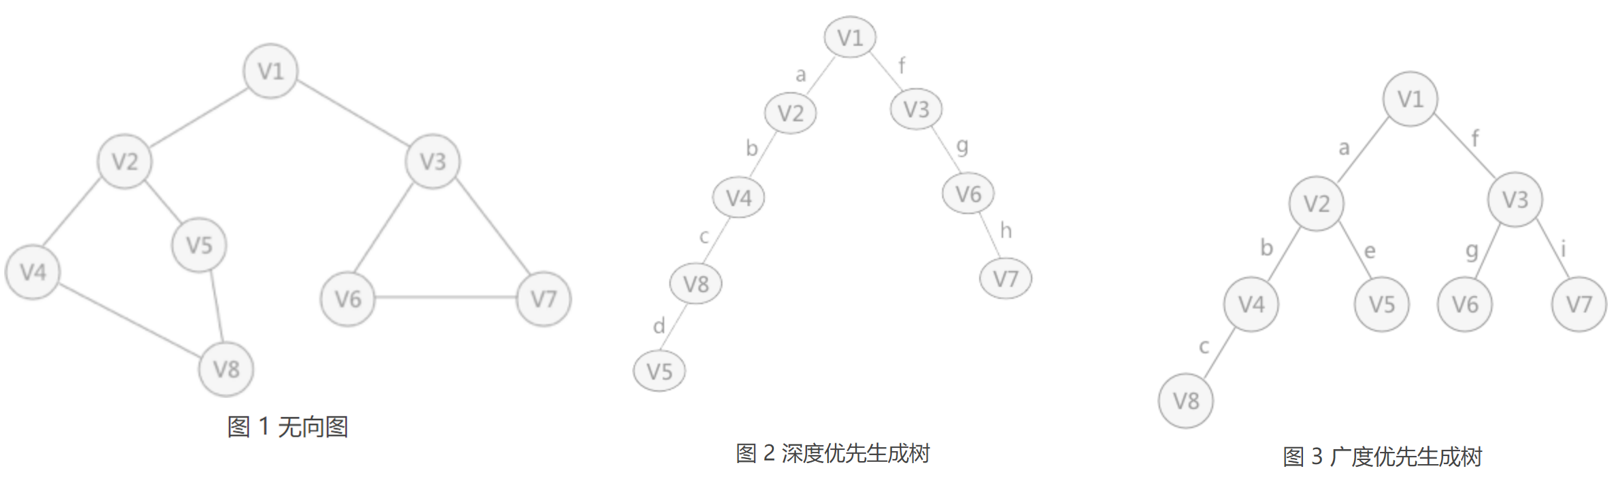

### 4. 创建图对象，并添加顶点和弧边

In [3]:
graph = Graph()
graph.AddEdge('V1', ['V2', 'V3'])
graph.AddEdge('V2', ['V1', 'V4', 'V5'])
graph.AddEdge('V3', ['V1', 'V6', 'V7'])
graph.AddEdge('V4', ['V2', 'V8'])
graph.AddEdge('V5', ['V2', 'V8'])
graph.AddEdge('V6', ['V3', 'V7'])
graph.AddEdge('V7', ['V3', 'V6'])
graph.AddEdge('V8', ['V4', 'V5'])
graph.ShowNode() # 输出查看下图中各结点的关系

V1 --  V2 --  V3
V2 --  V1 --  V4 --  V5
V3 --  V1 --  V6 --  V7
V4 --  V2 --  V8
V5 --  V2 --  V8
V6 --  V3 --  V7
V7 --  V3 --  V6
V8 --  V4 --  V5


### 5. 深度优先搜索和广度优先搜索

In [4]:
graph.DFS('V1') # 执行深度优先搜索, 首先传入根结点V1
print("深度优先搜索:", end = ' ')
graph.DFSTraverse()

graph.BFS('V1') # 执行广度优先搜索, 首先传入根结点V1
print("广度优先搜索:", end = ' ')
graph.BFSTraverse()

深度优先搜索: V1 -> V2 -> V4 -> V8 -> V5 -> V3 -> V6 -> V7
广度优先搜索: V1 -> V2 -> V3 -> V4 -> V5 -> V6 -> V7 -> V8
